# Steps of the project
**1. Exploratory Data Analysis**: Begin exploring the Telco Churn Dataset using pandas to compute summary statistics and Seaborn to create attractive visualizations.

**2. Preprocessing for Churn Modeling:** Having explored your data, it's now time to preprocess it and get it ready for machine learning. Learn the why, what, and how of preprocessing, including feature selection and feature engineering.

**3. Churn Prediction**: With your data preprocessed and ready for machine learning, it's time to predict churn! Learn how to build supervised learning machine models in Python using scikit-learn.

**4. Model Tuning**: Improve the performance of your models using hyperparameter tuning and gain a better understanding of the drivers of customer churn that you can take back to the business.

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Exploratory Data Analysis

## Exploring customer churn

In [5]:
import pandas as pd
telco = pd.read_csv('datasets/Churn.csv')
telco

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.100,197.400,244.700,10.000,1,no,no,yes,110,45.070,99,16.780,91,11.010,3,2.700,KS,415,382-4657
1,107,26,161.600,195.500,254.400,13.700,1,no,no,yes,123,27.470,103,16.620,103,11.450,3,3.700,OH,415,371-7191
2,137,0,243.400,121.200,162.600,12.200,0,no,no,no,114,41.380,110,10.300,104,7.320,5,3.290,NJ,415,358-1921
3,84,0,299.400,61.900,196.900,6.600,2,no,yes,no,71,50.900,88,5.260,89,8.860,7,1.780,OH,408,375-9999
4,75,0,166.700,148.300,186.900,10.100,3,no,yes,no,113,28.340,122,12.610,121,8.410,3,2.730,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.200,215.500,279.100,9.900,2,no,no,yes,77,26.550,126,18.320,83,12.560,6,2.670,AZ,415,414-4276
3329,68,0,231.100,153.400,191.300,9.600,3,no,no,no,57,39.290,55,13.040,123,8.610,4,2.590,WV,415,370-3271
3330,28,0,180.800,288.800,191.900,14.100,2,no,no,no,109,30.740,58,24.550,91,8.640,6,3.810,RI,510,328-8230
3331,184,0,213.800,159.600,139.200,5.000,2,no,yes,no,105,36.350,84,13.570,137,6.260,10,1.350,CT,510,364-6381


In [6]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

It looks like there are far more Non-Churners than Churners in our dataset.

## Summary statistics for both classes
Consider the following .groupby() code:

In [12]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(telco['Account_Length'])
plt.show()

## Diffreneces in account length

<AxesSubplot: xlabel='Churn', ylabel='Account_Length'>

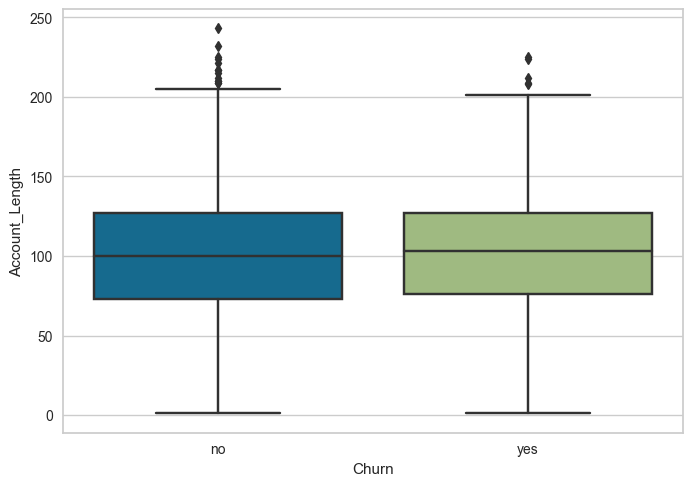

In [8]:
import seaborn as sns

sns.boxplot(x='Churn', y='Account_Length', data=telco)
plt.show()

<AxesSubplot: xlabel='Churn', ylabel='Account_Length'>

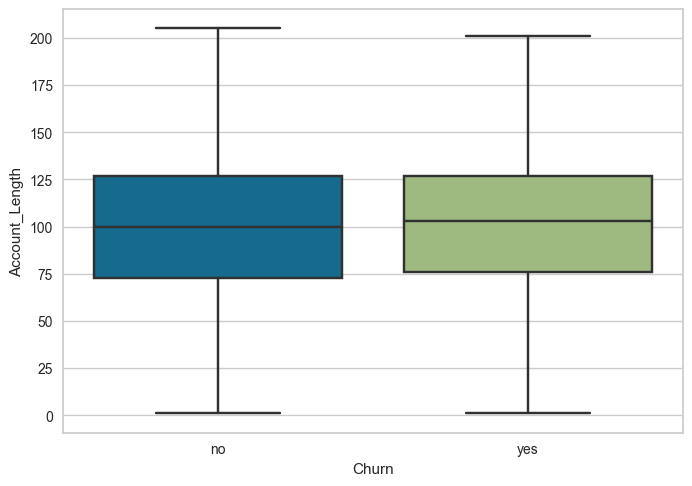

In [9]:
sns.boxplot(x='Churn', y='Account_Length', data=telco, sym="")
plt.show()

### Adding a third variable

<AxesSubplot: xlabel='Churn', ylabel='Account_Length'>

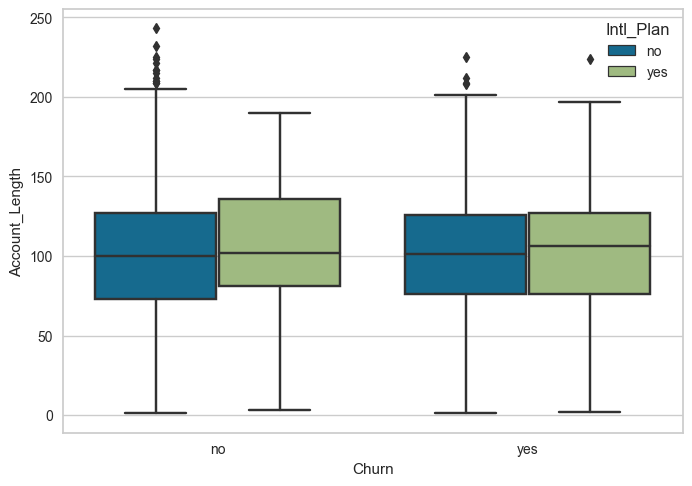

In [10]:
sns.boxplot(x='Churn', y='Account_Length', data=telco, hue = 'Intl_Plan')
plt.show()

### Exploring feature distributions

<AxesSubplot: xlabel='Day_Mins', ylabel='Density'>

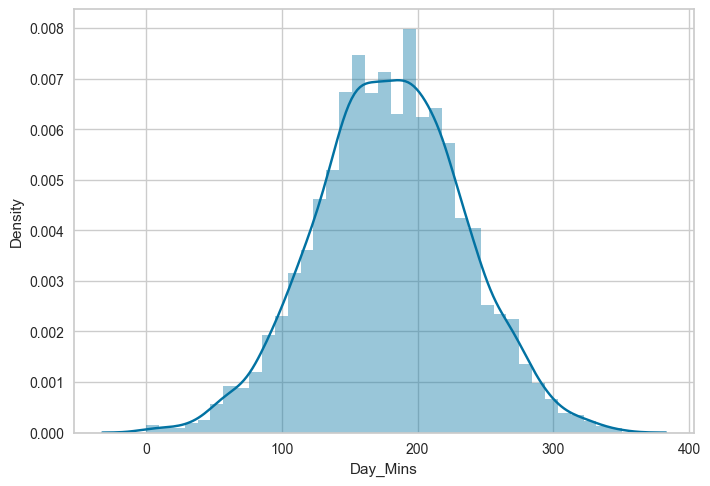

In [11]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])

# Display the plot
plt.show()

<AxesSubplot: xlabel='Eve_Mins', ylabel='Density'>

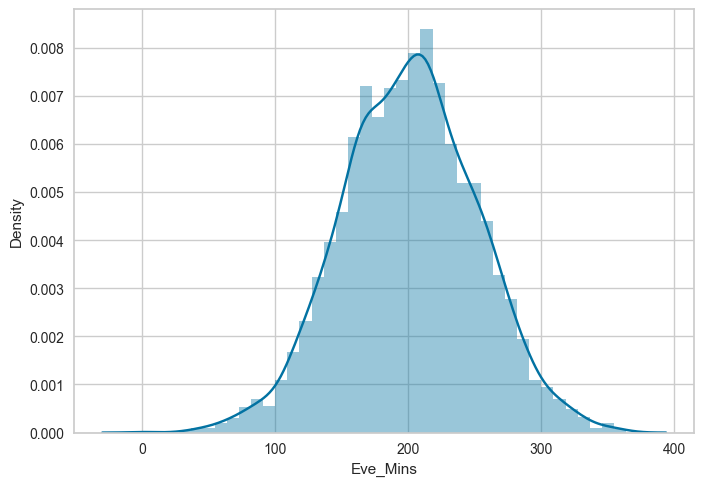

In [12]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Eve_Mins'
sns.distplot(telco['Eve_Mins'])

# Display the plot
plt.show()

<AxesSubplot: xlabel='Night_Mins', ylabel='Density'>

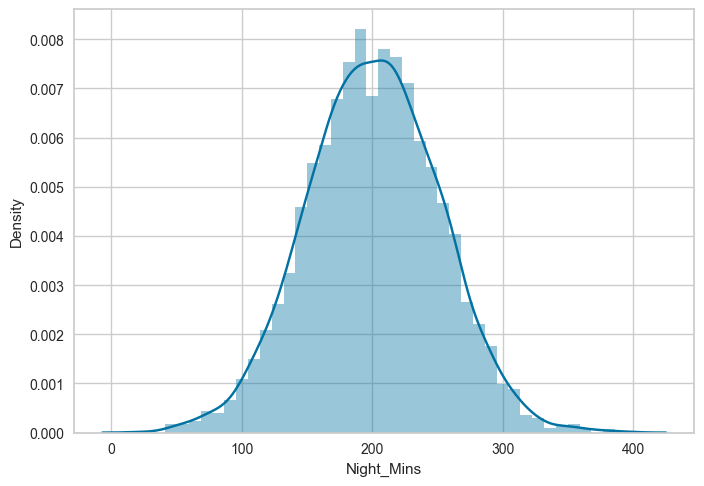

In [13]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])

# Display the plot
plt.show()

<AxesSubplot: xlabel='Intl_Mins', ylabel='Density'>

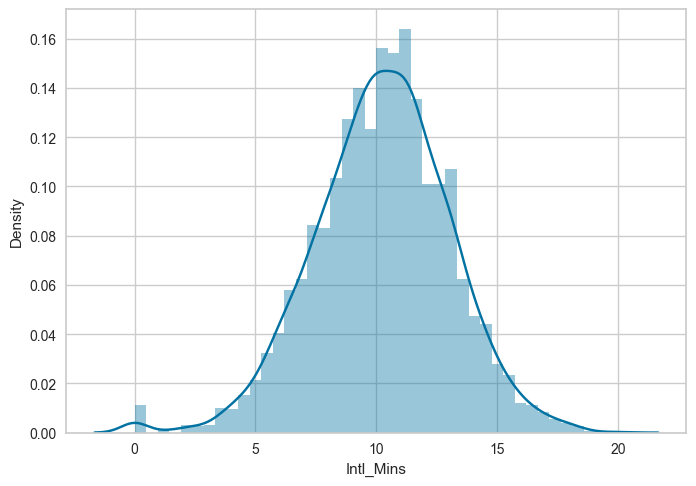

In [14]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Intl_Mins'])

# Display the plot
plt.show()

All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

### Customer service calls and churn
We've already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

If we want to remove outliers, you can specify the additional parameter sym="", and you can add a third variable using hue.

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

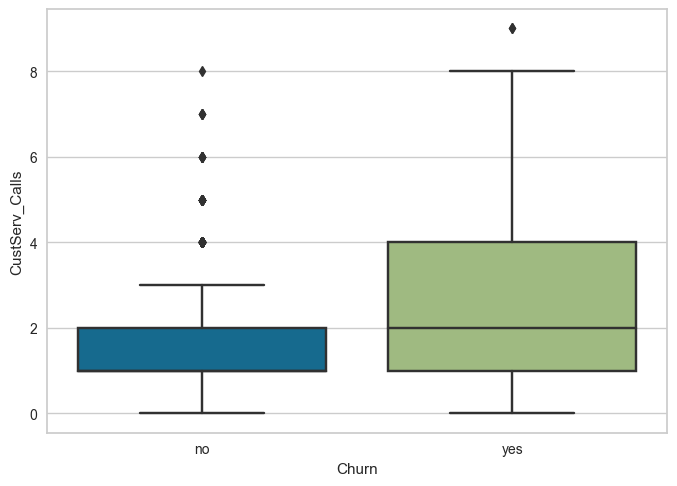

In [15]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco)

# Display the plot
plt.show()

There is a very noticeable difference here between churners and non-churners! Now, remove the outliers from the box plot.

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

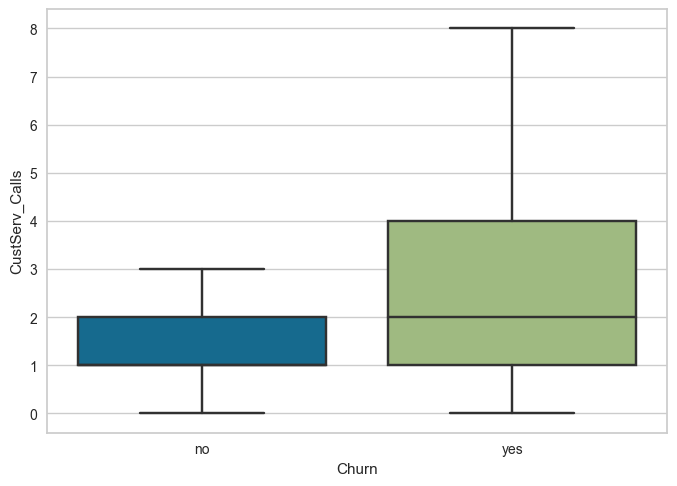

In [16]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Remove outliers
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "")

# Display the plot
plt.show()

Add a third variable to this plot - 'Vmail_Plan' - to visualize whether or not having a voice mail plan affects the number of customer service calls or churn.

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

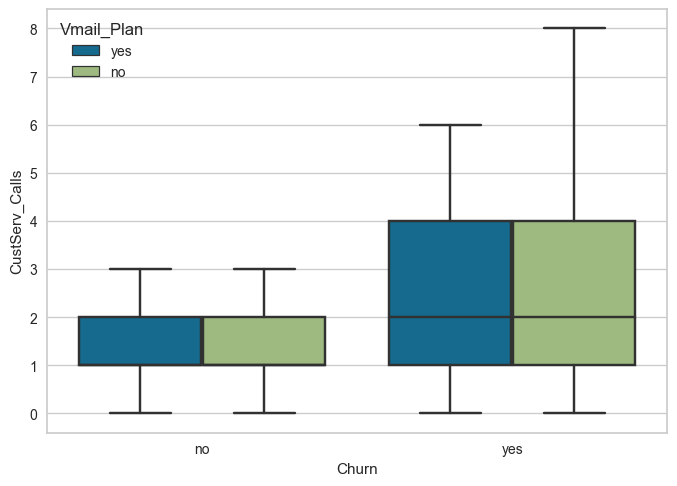

In [17]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

# Display the plot
plt.show()

Not much of a difference there. Update our code so that the third variable is 'Intl_Plan' instead.

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

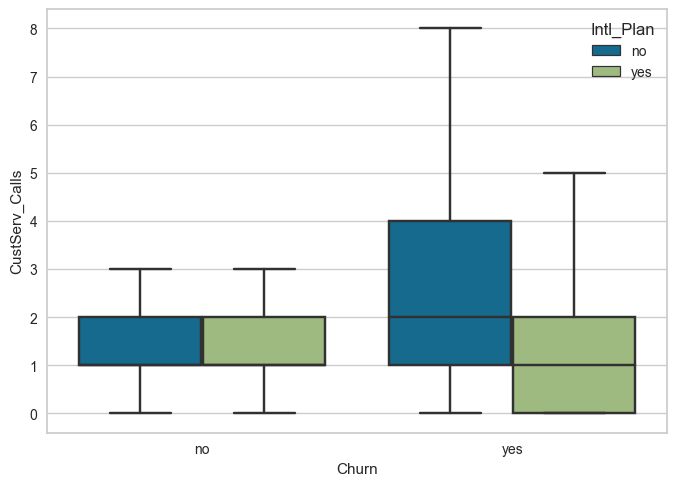

In [18]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn.

# Preprocessing for Churn Modeling
## Data preprocessing

In [19]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

Churn, Vmail_Plan, and Intl_Plan, in particular, are binary features that can easily be converted into 0s and 1s.

## Encoding binary features

In [21]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0 , 'yes': 1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no': 0 , 'yes': 1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


## One hot encoding

In [22]:
# Import pandas
import pandas as pd

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

pandas has a get_dummies() function which automatically applies one hot encoding over the selected feature.

In [23]:
# Import pandas
import pandas as pd

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

# Print the head of telco_state
print(telco_state.head())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   

Notice that this creates an entirely new DataFrame. Once we merge this back into the original telco DataFrame, you can begin using these state features in our models. Do note, however, that we now have many more features in our dataset, so we should consider dropping any that are unnecessary.

## Feature scaling

In [25]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Remove non-numeric values from telco
telco_numeric = telco[['Intl_Calls', 'Night_Mins']].apply(pd.to_numeric, errors='coerce').dropna()

# Scale telco
telco_scaled = StandardScaler().fit_transform(telco_numeric)

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())

       Intl_Calls  Night_Mins
count    3333.000    3333.000
mean       -0.000       0.000
std         1.000       1.000
min        -1.820      -3.514
25%        -0.601      -0.670
50%        -0.195       0.006
75%         0.618       0.681
max         6.307       3.839


Both features are now on the same scale. In practice, we'll need to carefully ensure this is the case for all features of interest.

## Feature selection and engineering
### Dropping unnecessary features
Some features such as 'Area_Code' and 'Phone' are not useful when it comes to predicting customer churn, and they need to be dropped prior to modeling. 

In [ ]:
# Drop the unnecessary features
telco = telco.drop(['Area_Code','Phone'], axis=1)

# Verify dropped features
print(telco.columns)

<script.py> output:
    Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
           'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
          dtype='object')

## Engineering a new column
Leveraging domain knowledge to engineer new features is an essential part of modeling. This quote from Andrew Ng summarizes the importance of feature engineering:

Coming up with features is difficult, time-consuming, requires expert knowledge. __"Applied machine learning"_ is basically feature engineering._

In [37]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())

0   2.689
1   2.470
2   1.563
3   2.212
4   1.545
Name: Avg_Night_Calls, dtype: float64


# Churn Prediction

## Predicting whether a new customer will churn

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

In [ ]:
<script.py> output:
    [0]

## Training another scikit-learn model

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

In [ ]:
<script.py> output:
    [0]

In [42]:
import pandas as pd
telco = pd.read_csv('datasets/Churn.csv')
telco

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.100,197.400,244.700,10.000,1,no,no,yes,110,45.070,99,16.780,91,11.010,3,2.700,KS,415,382-4657
1,107,26,161.600,195.500,254.400,13.700,1,no,no,yes,123,27.470,103,16.620,103,11.450,3,3.700,OH,415,371-7191
2,137,0,243.400,121.200,162.600,12.200,0,no,no,no,114,41.380,110,10.300,104,7.320,5,3.290,NJ,415,358-1921
3,84,0,299.400,61.900,196.900,6.600,2,no,yes,no,71,50.900,88,5.260,89,8.860,7,1.780,OH,408,375-9999
4,75,0,166.700,148.300,186.900,10.100,3,no,yes,no,113,28.340,122,12.610,121,8.410,3,2.730,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.200,215.500,279.100,9.900,2,no,no,yes,77,26.550,126,18.320,83,12.560,6,2.670,AZ,415,414-4276
3329,68,0,231.100,153.400,191.300,9.600,3,no,no,no,57,39.290,55,13.040,123,8.610,4,2.590,WV,415,370-3271
3330,28,0,180.800,288.800,191.900,14.100,2,no,no,no,109,30.740,58,24.550,91,8.640,6,3.810,RI,510,328-8230
3331,184,0,213.800,159.600,139.200,5.000,2,no,yes,no,105,36.350,84,13.570,137,6.260,10,1.350,CT,510,364-6381


## Creating training and test sets

In [44]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
len(X_train)

len(X_test)

2333

1000

## Computing accuracy
Having split your data into training and testing sets, we can now fit your model to the training data and then predict the labels of the test data. 

In [ ]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Instantiate the classifier
clf = RandomForestClassifier()

# Encode categorical variables
le = LabelEncoder()
X_train['column_name'] = le.fit_transform(X_train['column_name'])
X_test['column_name'] = le.transform(X_test['column_name'])

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

In [ ]:
<script.py> output:
    0.949

Random forest classifier outperforms the support vector classifier.

## Confusion matrix
sklearn, by default, computes the confusion matrix as follows:
![resim_2023-04-19_151120607](resim_2023-04-19_151120607.png)


In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
<script.py> output:
    [[844  11]
     [ 40 105]]

## Varying training set size
The size of we training and testing sets influences model performance. Models learn better when they have more training data. However, there's a risk that they overfit to the training data and don't generalize well to new data, so in order to properly evaluate the model's ability to generalize, we need enough testing data. 

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
<script.py> output:
    [[561   8]
     [ 28  70]]

As a reminder, here's the output from the previous confusion matrix:
![resim_2023-04-19_152200859](resim_2023-04-19_152200859.png)

This classifier has a higher precision than the previous classifier.

## Computing precision and recall

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

In [ ]:
<script.py> output:
    0.8809523809523809

In [ ]:
<script.py> output:
    0.6981132075471698

## ROC curve

In [7]:
import pandas as pd

telco_churn_df = pd.read_csv('datasets/Churn.csv')

X_train = telco_churn_df.drop('Churn', axis=1)  # Corrected column name to 'Churn'

y_train = telco_churn_df['Churn']  # Corrected column name to 'Churn'

print(X_train.head())  

print("\n")

print(y_train.head())

   Account_Length  Vmail_Message  Day_Mins  ...  State  Area_Code     Phone
0             128             25     265.1  ...     KS        415  382-4657
1             107             26     161.6  ...     OH        415  371-7191
2             137              0     243.4  ...     NJ        415  358-1921
3              84              0     299.4  ...     OH        408  375-9999
4              75              0     166.7  ...     OK        415  330-6626

[5 rows x 20 columns]


0    no
1    no
2    no
3    no
4    no
Name: Churn, dtype: object


In [11]:
import pandas as pd
churn = pd.read_csv('datasets/Churn.csv')
churn

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,77,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,57,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,109,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,105,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

telco_churn_df = pd.read_csv('datasets/Churn.csv')

X = telco_churn_df.drop(['Churn'], axis=1) 

y = telco_churn_df['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.head())  

print(y_train.head())  

print(X_test.head())

print(y_test.head())

      Account_Length  Vmail_Message  Day_Mins  ...  State  Area_Code     Phone
817              243              0      95.5  ...     UT        510  355-9360
1373             108              0     112.0  ...     SC        415  399-6233
679               75              0     222.4  ...     TX        415  384-2372
56               141              0     126.9  ...     CO        415  340-5121
1993              86              0     216.3  ...     IN        510  357-7893

[5 rows x 20 columns]
817      no
1373    yes
679     yes
56       no
1993     no
Name: Churn, dtype: object
      Account_Length  Vmail_Message  Day_Mins  ...  State  Area_Code     Phone
438              113              0     155.0  ...     WY        510  352-6573
2674              67              0     109.1  ...     IL        415  369-4377
1345              98              0       0.0  ...     SD        415  392-2555
1957             147              0     212.8  ...     KY        408  396-2945
2148              96 

In [ ]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Fit the classifier with the training data
clf.fit(X_train, y_train)

# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

![resim_2023-04-19_181134545](resim_2023-04-19_181134545.png)


## Area under the curve
The ROC curve from the previous exercise is viewable on the right. Visually, it looks like a well-performing model. Let's quantify this by computing the area under the curve.

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Define y_pred_prob using a hypothetical model clf
y_pred_prob = clf.predict_proba(X_test.astype(float))[:, 1]

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

In [ ]:
<script.py> output:
    0.9016858237547891

This indicates that this baseline random forest classifier is quite good.

## F1 score
As we've discovered, there's a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, we may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric we can use in these cases, and another is the F1 score, which is calculated as below:

2 * (precision * recall) / (precision + recall)

The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes

In [ ]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

In [ ]:
<script.py> output:
    0.7789473684210525

## Tuning model
### Tuning the number of features
The default hyperparameters used by your models are not optimized for your data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance. 
A random forest classifier has been instantiated for you as clf.

![resim_2023-04-19_182759798](resim_2023-04-19_182759798.png)

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
X['categorical_column'] = le.fit_transform(X['categorical_column'])

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

In [ ]:
<script.py> output:
    {'max_features': 'log2'}

It looks like taking a log of the number of features leads to optimal model performance. By default, the model takes the square root of the number of features.

## Tuning other hyperparameters
![resim_2023-04-19_183243955](resim_2023-04-19_183243955.png)


In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the best hyperparameters
print(grid_search.best_params_) 

In [ ]:
<script.py> output:
    {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}

### Question
Use the .best_params_ attribute of grid_search to identify the best combination of parameters, hit "Run Code", and then select the correct option.

### Answer
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}

__Notice_ how the grid search took longer this time. That's because the grid to search through was larger compared to the previous exercise._

## Randomized search

#Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

#Fit the model
grid_search.fit(X, y)

In the above chunk of code from the previous exercise, you may have noticed that the first line of code did not take much time to run, while the call to .fit() took several seconds to execute.

This is because .fit() is what actually performs the grid search, and in our case, it was grid with many different combinations. As the hyperparameter grid gets larger, grid search becomes slower. In order to solve this problem, instead of trying out every single combination of values, we could randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In scikit-learn, you can do this using RandomizedSearchCV. It has the same API as GridSearchCV, except that you need to specify a parameter distribution that it can sample from instead of specific hyperparameter values. Let's try it out now! The parameter distribution has been set up for you, along with a random forest classifier called clf.

In [ ]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print(random_search.best_params_)

In [ ]:
<script.py> output:
    {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}

## Visualizing feature importances
Your random forest classifier from earlier exercises has been fit to the telco data and is available to you as clf. Let's visualize the feature importances and get a sense for what the drivers of churn are, using matplotlib's barh to create a horizontal bar plot of feature importances.

In [ ]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

![resim_2023-04-19_184301065](resim_2023-04-19_184301065.png)


But this is not any easier to interpret... let's sort the importances and add labels so we can properly interpret the plot.

## Improving the plot
In order to make the plot more readable, we need to do achieve two goals:

Re-order the bars in ascending order.
Add labels to the plot that correspond to the feature names.
To do this, we'll take advantage of NumPy indexing. The .argsort() method sorts an array and returns the indices. We'll use these indices to achieve both goals.

In [ ]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

![resim_2023-04-19_184550439](resim_2023-04-19_184550439.png)


Now we have a good understanding of which features are important in driving churn.

The plot tells us that CustServ_Calls, Day_Mins and Day_Charge are the most important drivers of churn. What if we added additional sources of data and more features? Let's explore this now.

## Does model performance improve?
6 new features have been added to the telco DataFrame:

- Region_Code
- Cost_Call
- Total_Charge
- Total_Minutes
- Total_Calls
- Min_Call

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test, y_test))

In [ ]:
<script.py> output:
    0.972

## Computing other metrics
In addition to accuracy, let's also compute the F1 score of this new model to get a better picture of model performance.

In [ ]:
# Import f1_score
from sklearn.metrics import f1_score

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the F1 score
print(f1_score(y_test, y_pred))

In [ ]:
<script.py> output:
    0.8931297709923663